In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Separation of X and Y

In [4]:
X = df.drop(columns=['math_score'], axis=1)

In [5]:
y = df['math_score']

- After separating the X and the y variables we need to use one hot encoing for the categorical features and for the numerival features , standard scaling. 


In [6]:
num_col = X.select_dtypes(include=np.number).columns.tolist()
cat_col = X.select_dtypes(include='object').columns.tolist()

In [7]:
num_col

['reading_score', 'writing_score']

In [8]:
cat_col

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(), cat_col)
    ])

In [10]:
X = preprocessor.fit_transform(X)   

In [11]:
X

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

- Now we can proceed to split the data into training and testing sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(800, 19)

In [14]:
X_test.shape

(200, 19)

### Creating a function to evaluate the model after training

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [20]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Function to evaluate the model performance on training and testing data.
    """

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Testing metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print("Training Set Evaluation:")
    print(f"MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R2: {train_r2:.2f}")
    print("\nTesting Set Evaluation:")
    print(f"MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R2: {test_r2:.2f}")

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

model = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor() ,
    'XGBRegressor': XGBRegressor(random_state=42),

    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)        
}

In [25]:
model_list = []
r2_scores = []
best_model = None
best_r2 = -np.inf
for name, m in model.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
    print(f"Evaluating {name}...")
    evaluate_model(m, X_train, X_test, y_train, y_test)
    model_list.append((name, m))
    r2_scores.append(r2_score(y_test, m.predict(X_test)))
    best_model = m if r2_score(y_test, m.predict(X_test)) > best_r2 else best_model
    best_r2 = max(r2_score(y_test, m.predict(X_test)), best_r2)
    print("-" * 50)
    print("\n")

Training Linear Regression...
Evaluating Linear Regression...
Training Set Evaluation:
MAE: 4.27, MSE: 28.33, R2: 0.87

Testing Set Evaluation:
MAE: 4.21, MSE: 29.10, R2: 0.88
--------------------------------------------------


Training Decision Tree...
Evaluating Decision Tree...
Training Set Evaluation:
MAE: 0.02, MSE: 0.08, R2: 1.00

Testing Set Evaluation:
MAE: 6.23, MSE: 61.26, R2: 0.75
--------------------------------------------------


Training Random Forest...
Evaluating Random Forest...
Training Set Evaluation:
MAE: 1.83, MSE: 5.32, R2: 0.98

Testing Set Evaluation:
MAE: 4.71, MSE: 36.40, R2: 0.85
--------------------------------------------------


Training Lasso Regression...
Evaluating Lasso Regression...
Training Set Evaluation:
MAE: 5.21, MSE: 43.48, R2: 0.81

Testing Set Evaluation:
MAE: 5.16, MSE: 42.51, R2: 0.83
--------------------------------------------------


Training Ridge Regression...
Evaluating Ridge Regression...
Training Set Evaluation:
MAE: 4.26, MSE: 28.

In [26]:
best_model

Ridge()

In [30]:
model_names = [model[0] for model in model_list]

In [31]:
pd.DataFrame(list(zip(model_names, r2_scores)), columns=['Model Name', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model Name,R2 Score
4,Ridge Regression,0.880593
0,Linear Regression,0.880433
2,Random Forest,0.850403
7,AdaBoost Regressor,0.850225
3,Lasso Regression,0.825320
6,XGBRegressor,0.821221
5,K-Neighbors Regressor,0.783770
1,Decision Tree,0.748252


- Rigde has the highest r2.

Ridge Regression

In [32]:
y_pred = best_model.predict(X_test)

In [33]:
y_pred

array([76.3987055 , 58.84246852, 76.99212919, 76.80589764, 87.61538749,
       78.91544968, 64.71522731, 53.04476091, 74.11589982, 49.3668472 ,
       52.86364945, 36.66586329, 67.90010027, 52.34637169, 86.66674369,
       70.53102302, 52.0526133 , 46.87367572, 48.90217316, 52.77820982,
       73.90330354, 38.96085744, 57.45665473, 36.45000985, 78.10707214,
       81.73401288, 75.42961863, 46.25195917, 31.18920388, 49.90794333,
       65.9793611 , 70.34584993, 60.54916026, 83.61763373, 84.38596059,
       46.05747314, 76.09690006, 70.22415484, 65.94711957,  3.90694796,
       78.46548199, 67.27292319, 67.95257934, 60.24626869, 79.74038938,
       67.46247194, 72.17873703, 24.80784142, 85.9925527 , 70.15151182,
       75.4524599 , 66.85074943, 81.15547981, 45.70002356, 66.08892274,
       67.34899237, 86.05435071, 58.72510069, 82.29535888, 81.20092755,
       47.23473541, 72.0034379 , 70.62007413, 55.8597151 , 86.31577649,
       63.85062577, 59.52012466, 55.85023085, 57.16098082, 82.21

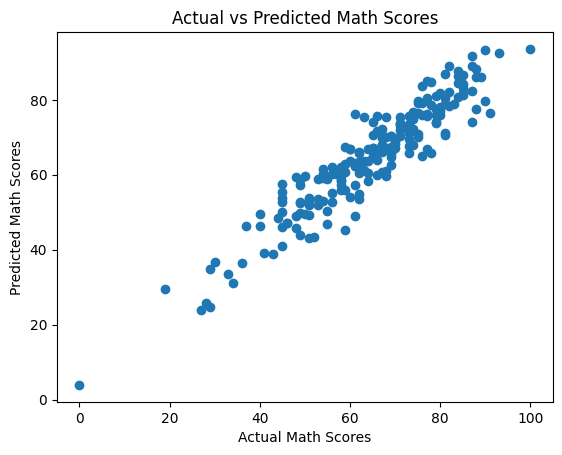

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

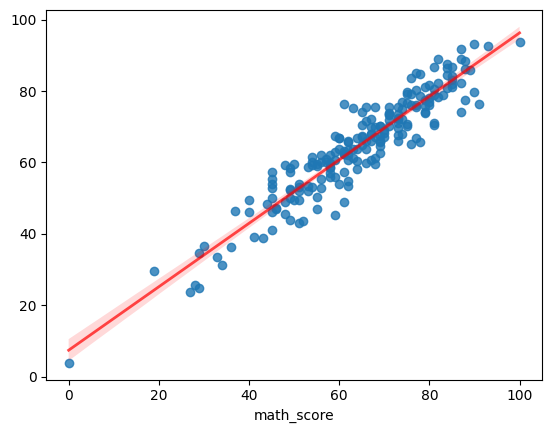

In [35]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.show()

In [36]:
residuals = y_test - y_pred
resid = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})
resid.head()

,Actual,Predicted,Residuals
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
